# Title: House Price Prediction

<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">👨‍💻Author: KumKum Gupta</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/kumkumwebkim?tab=repositories)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/muhammadaammartufail) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/kumkum-gupta-3190b2233?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app )

[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/kumkum.gupta.245896)


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [43]:
data = pd.read_csv('house_price_regression_dataset.csv')

In [44]:
data.head()

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06

In [45]:
data.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [47]:
data

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0              1360             2              1        1981  0.599637   
1              4272             3              3        2016  4.753014   
2              3592             1              2        2016  3.634823   
3               966             1              2        1977  2.730667   
4              4926             2              1        1993  4.699073   
..              ...           ...            ...         ...       ...   
995            3261             4              1        1978  2.165110   
996            3179             1              2        1999  2.977123   
997            2606             4              2        1962  4.055067   
998            4723             5              2        1950  1.930921   
999            3268             4              2        1983  3.108790   

     Garage_Size  Neighborhood_Quality   House_Price  
0              0                     5  2.623829e+05  
1              1                     6  9.852609e+05  
2              0                     9  7.779774e+05  
3              1                     8  2.296989e+05  
4              0                     8  1.041741e+06  
..           ...                   ...           ...  
995            2                    10  7.014940e+05  
996            1                    10  6.837232e+05  
997            0                     2  5.720240e+05  
998            0                     7  9.648653e+05  
999            2                     2  7.425993e+05  

[1000 rows x 8 columns]

#  Find missing values

In [48]:
data.isnull().mean()

Square_Footage          0.0
Num_Bedrooms            0.0
Num_Bathrooms           0.0
Year_Built              0.0
Lot_Size                0.0
Garage_Size             0.0
Neighborhood_Quality    0.0
House_Price             0.0
dtype: float64

# Correlation matrix


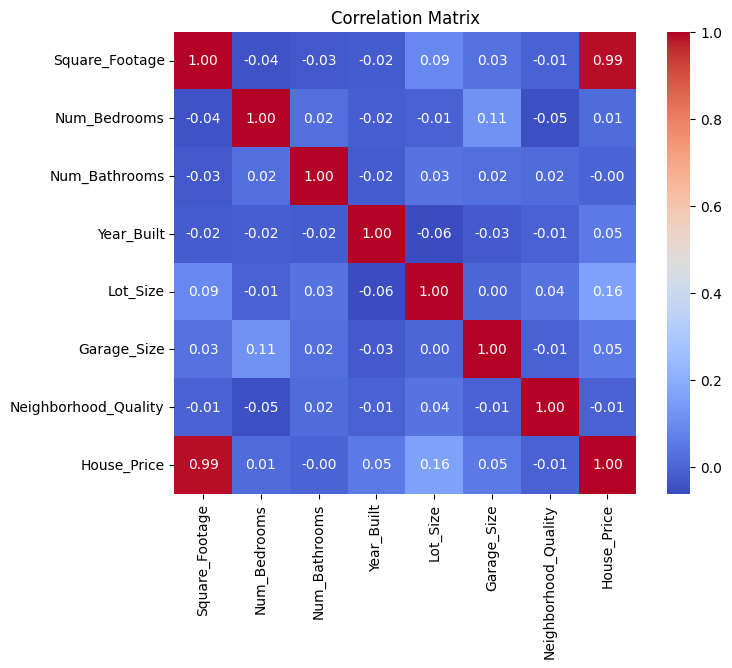

In [49]:
# Correlation matrix
data.corr()
# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Categorical columns

In [50]:
# Categorical and continuous features
categorical = []
for col in data.columns:
    if data[col].nunique() < 10:
        categorical.append(col)

In [51]:
categorical

['Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size']

continue columns

In [52]:
continuous = []
for col in data.columns:
    if data[col].nunique() >= 10:
        # print(f"{col}")
        continuous.append(col)

In [53]:
continuous

['Square_Footage',
 'Year_Built',
 'Lot_Size',
 'Neighborhood_Quality',
 'House_Price']

# Compare the distribution of the target variable


In [54]:
data['House_Price'].describe()


count    1.000000e+03
mean     6.188610e+05
std      2.535681e+05
min      1.116269e+05
25%      4.016482e+05
50%      6.282673e+05
75%      8.271413e+05
max      1.108237e+06
Name: House_Price, dtype: float64

Histogram of House Price

In [55]:
histogram = px.histogram(data, x='House_Price', nbins=80, title='Distribution of House Prices')
histogram.update_layout(xaxis_title='House Price', yaxis_title='Count')
histogram.show()

# Scatter plot for House_Price vs. Square_Footage


In [56]:
# Scatter plot for House_Price vs. Square_Footage
scatter_area = px.scatter(data, x='Square_Footage', y='House_Price', title='House Price vs. Square Footage')
scatter_area.update_layout(xaxis_title='Square Footage', yaxis_title='House Price')
scatter_area.show()

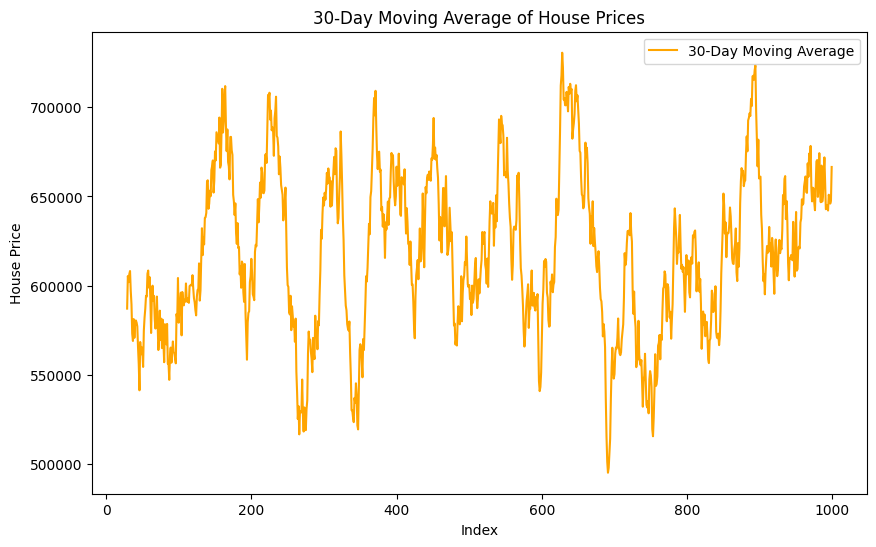

In [58]:
# Calculate the 30-day moving average of House_Price


data['Moving_Average_Price'] = data['House_Price'].rolling(window=30).mean()
# Line plot for moving average of House_Price
plt.figure(figsize=(10,6))
plt.plot(data['Moving_Average_Price'], label='30-Day Moving Average', color='orange')
plt.title('30-Day Moving Average of House Prices')
plt.xlabel('Index')
plt.ylabel('House Price')
plt.legend()
plt.show()


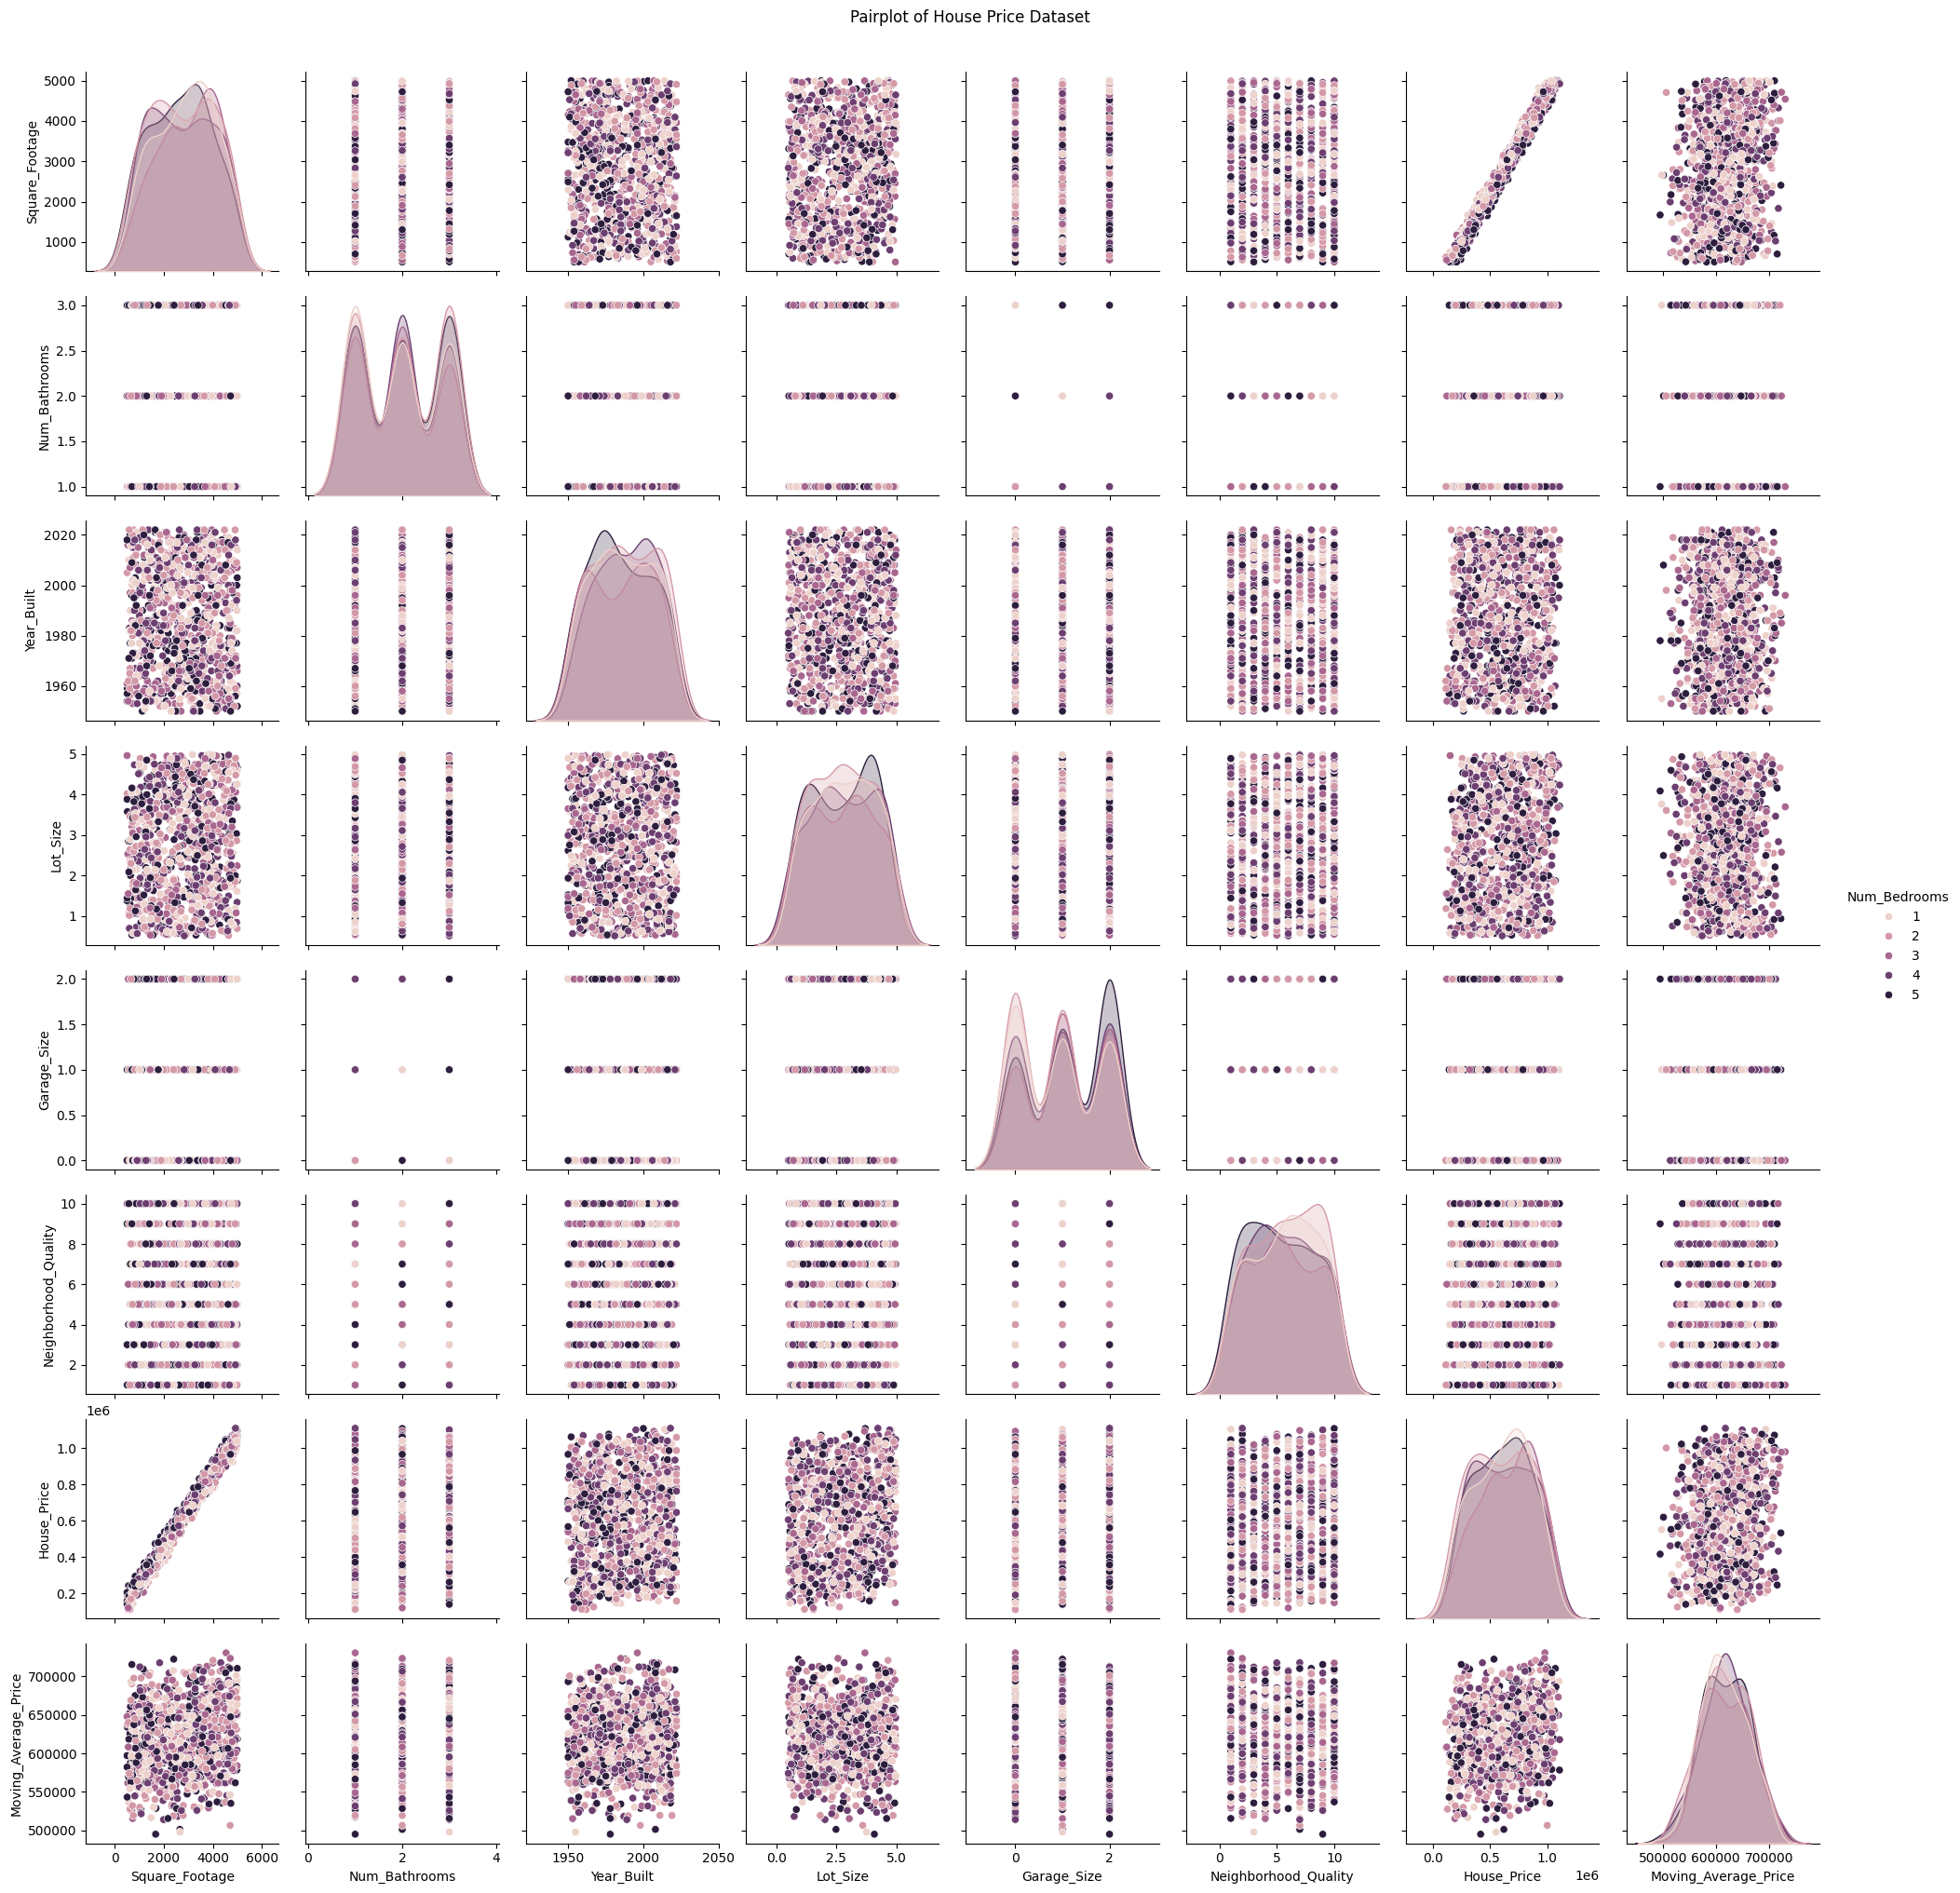

In [59]:
# Pairplot
sns.pairplot(data, diag_kind='kde', markers='o', hue='Num_Bedrooms')
plt.suptitle('Pairplot of House Price Dataset', y=1.02)
plt.show()

<Figure size 1200x1800 with 0 Axes>

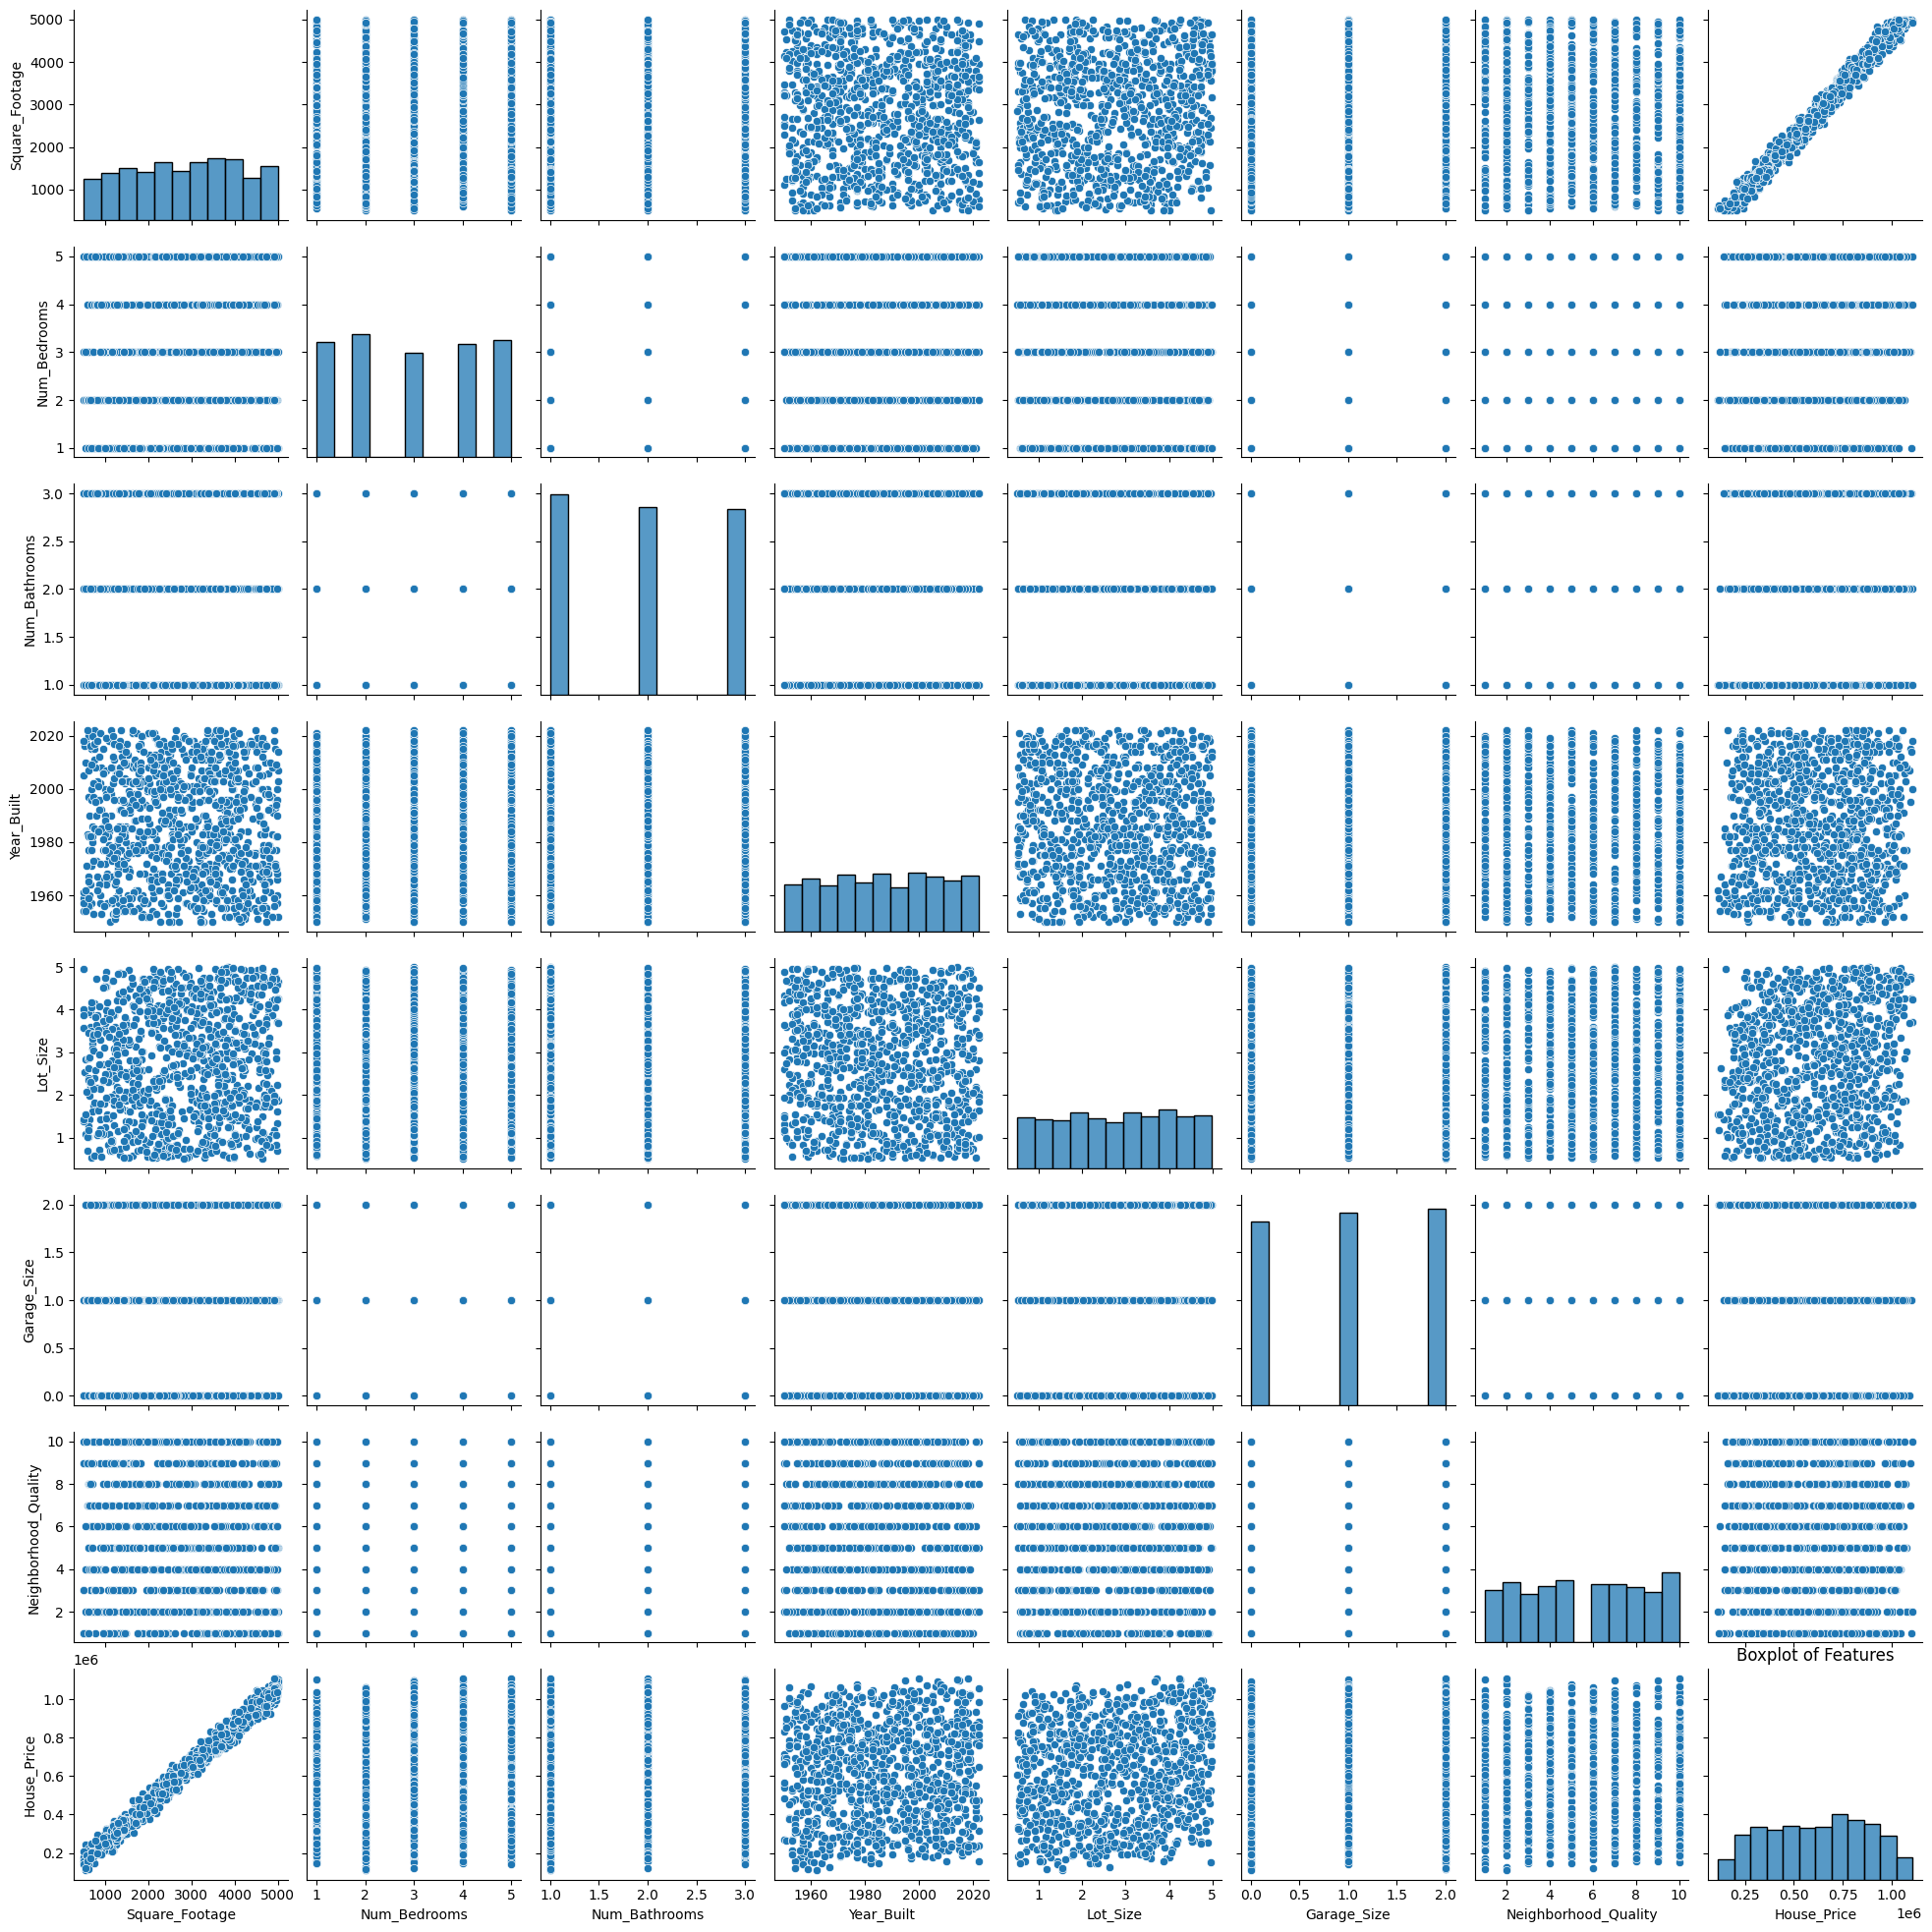

In [60]:
# outliers
plt.figure(figsize=(12, 18))
sns.pairplot(data[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price']])
plt.title('Boxplot of Features')
plt.show()

# Now check outliers

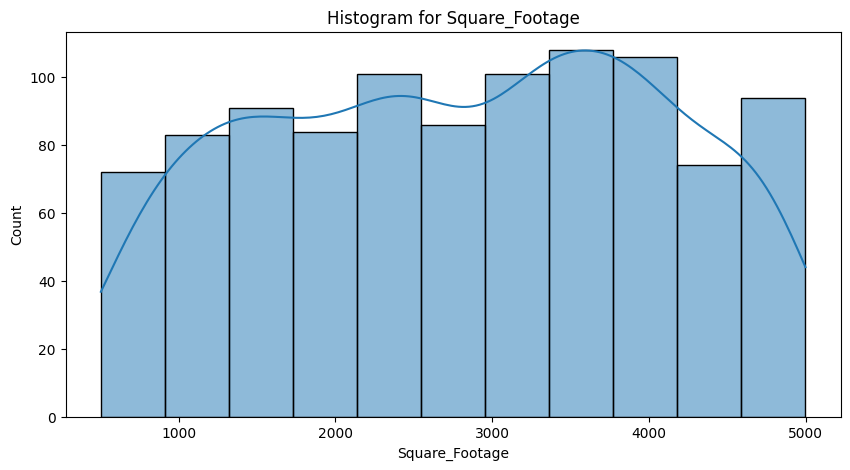

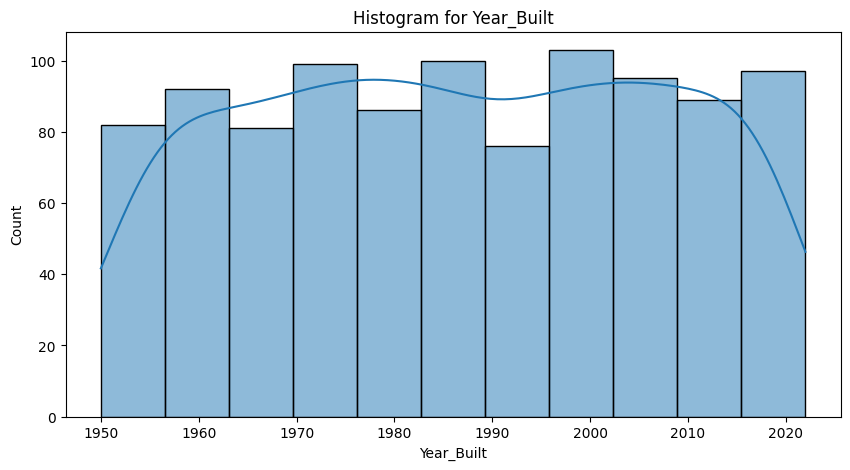

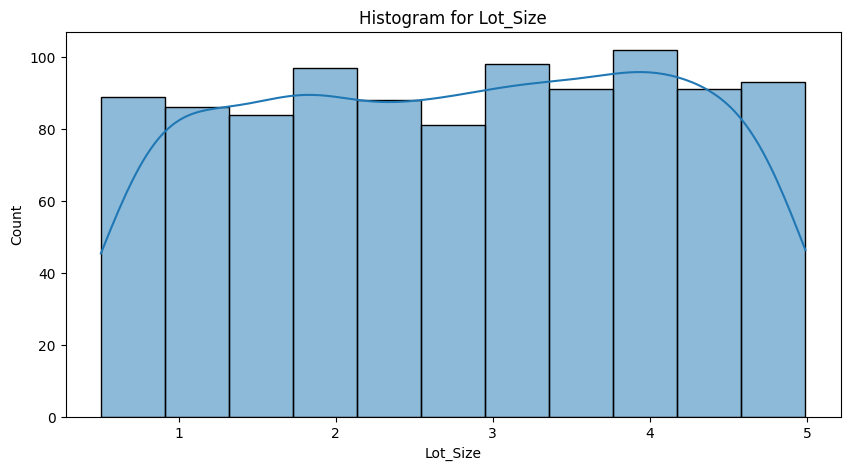

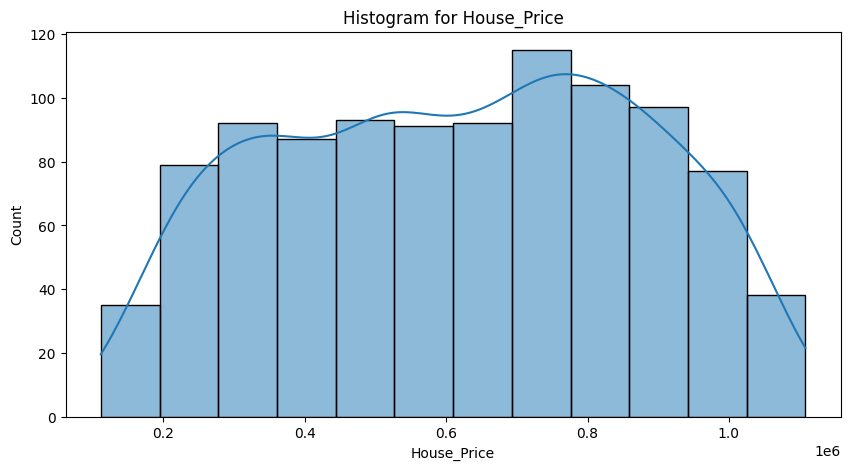

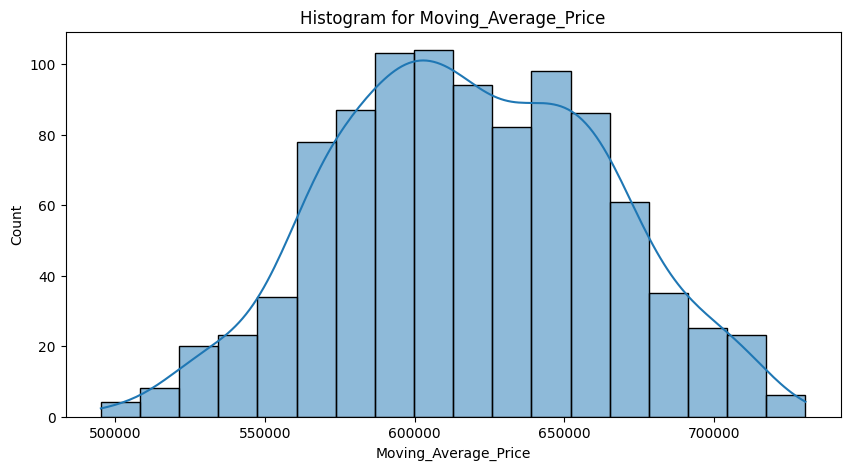

In [61]:
# Histogram of continuous columns
for col in data.columns:
    if data[col].nunique() > 10:
        plt.figure(figsize=(10, 5))
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram for {col}')
        plt.show()

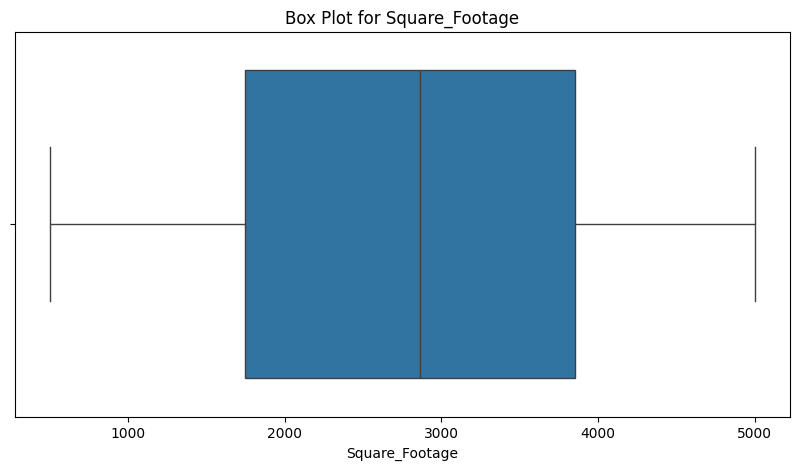

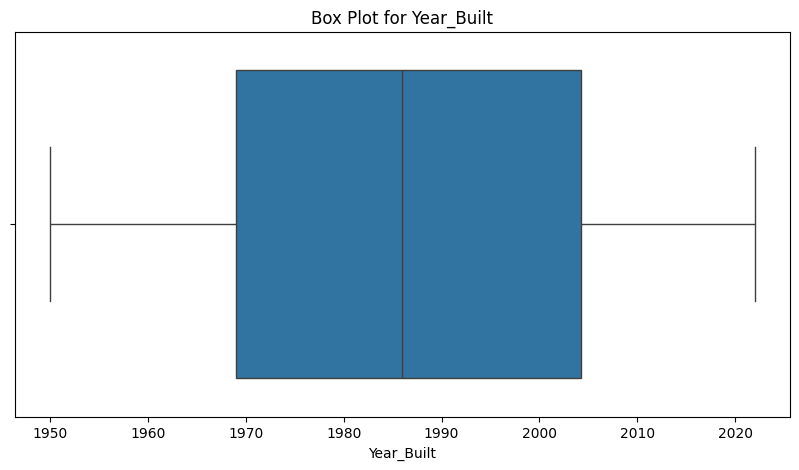

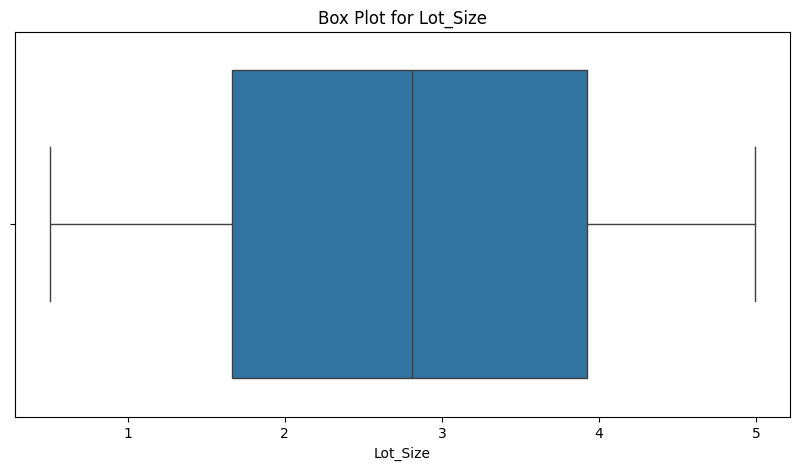

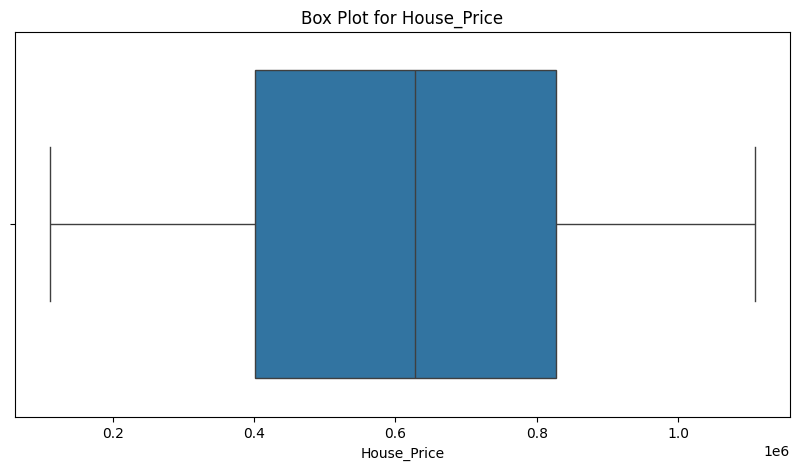

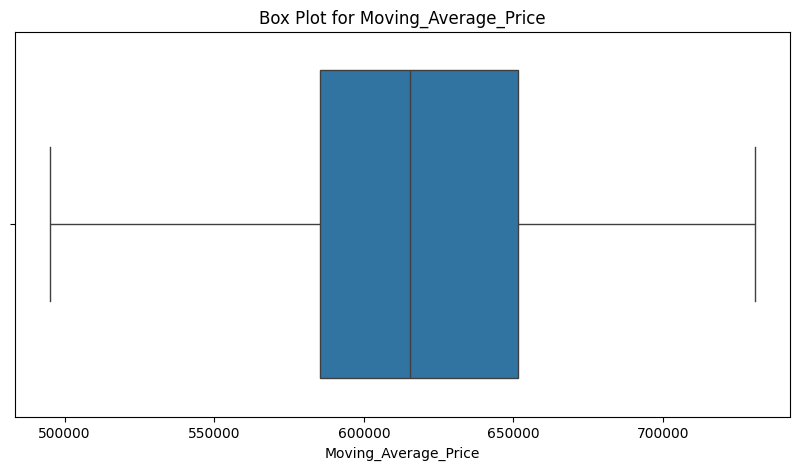

In [62]:
# continuous columns box plot
for col in data.columns:
    if data[col].nunique() > 10:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=data[col])
        plt.title(f'Box Plot for {col}')
        plt.show()

There is no outliers shown in the box plot of continuous columns.

# Now check for outliers in categorical columns
    

In [63]:
categorical

['Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size']

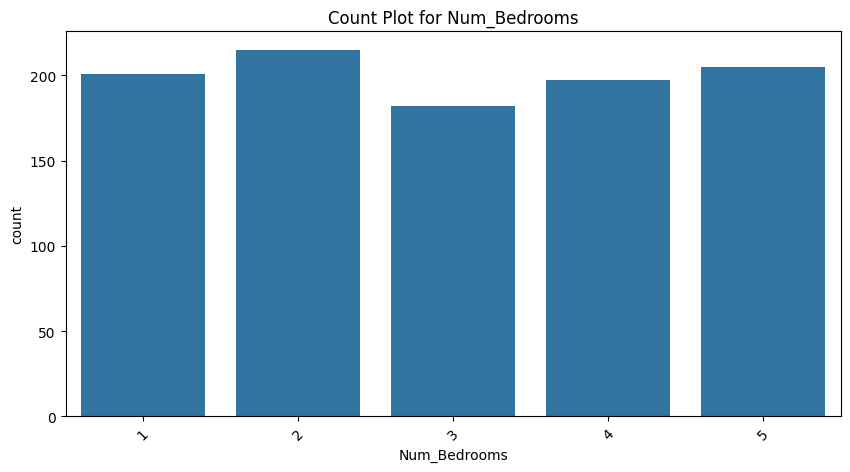

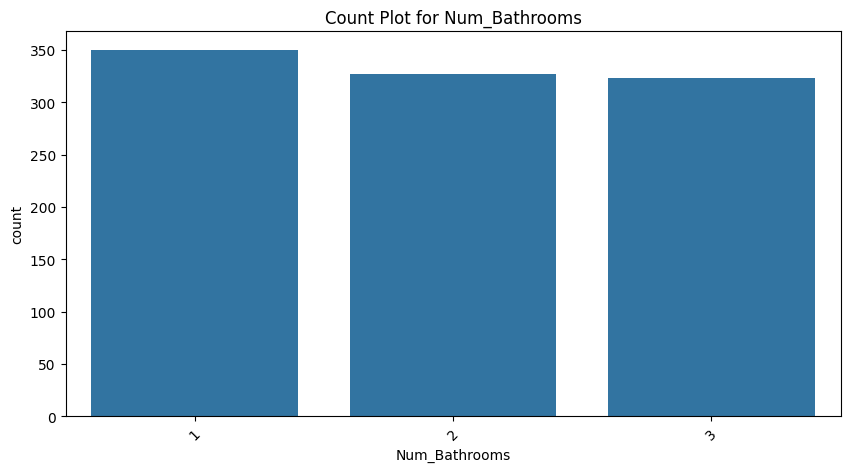

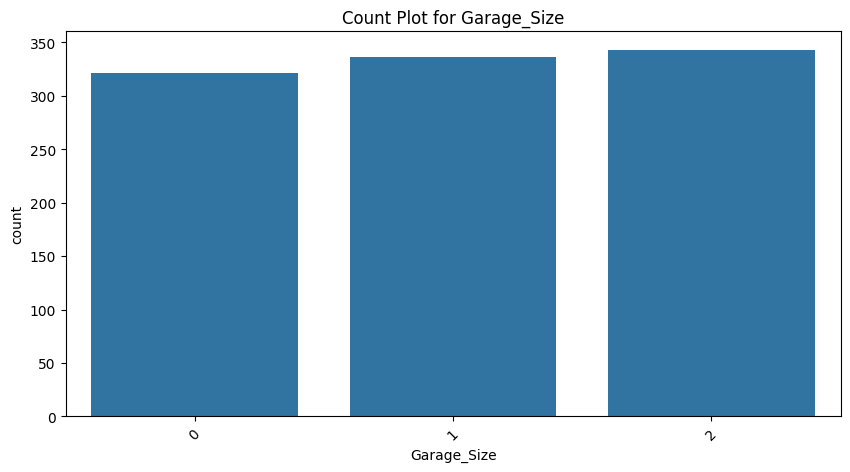

In [64]:
categorical = []
for col in data.columns:
    if data[col].nunique() < 10:
        categorical.append(col)

# Plotting the count plots for the categorical columns
for col in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col)  # Use countplot for categorical data
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.show()




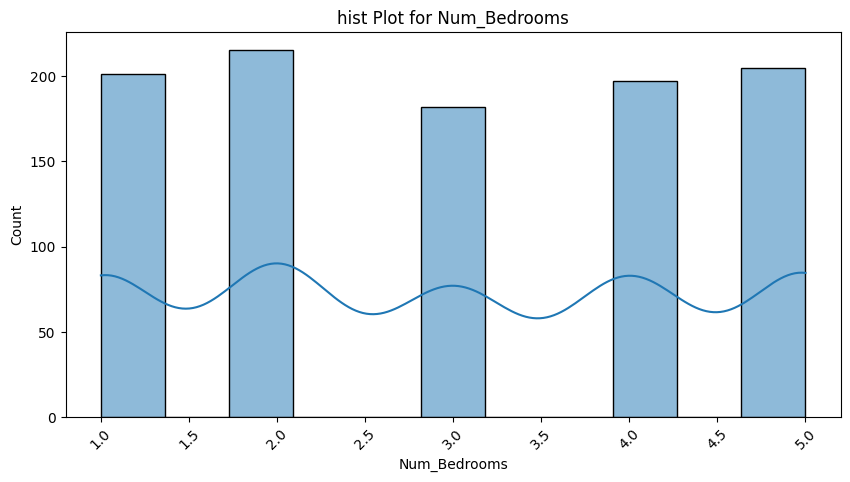

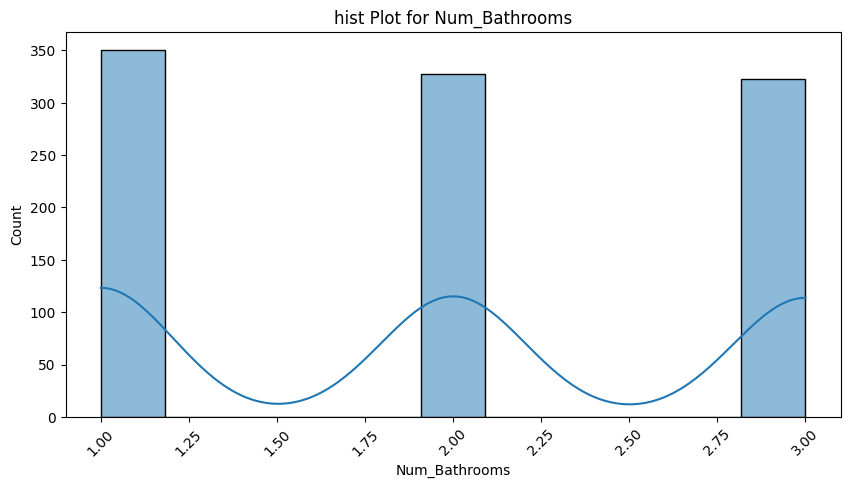

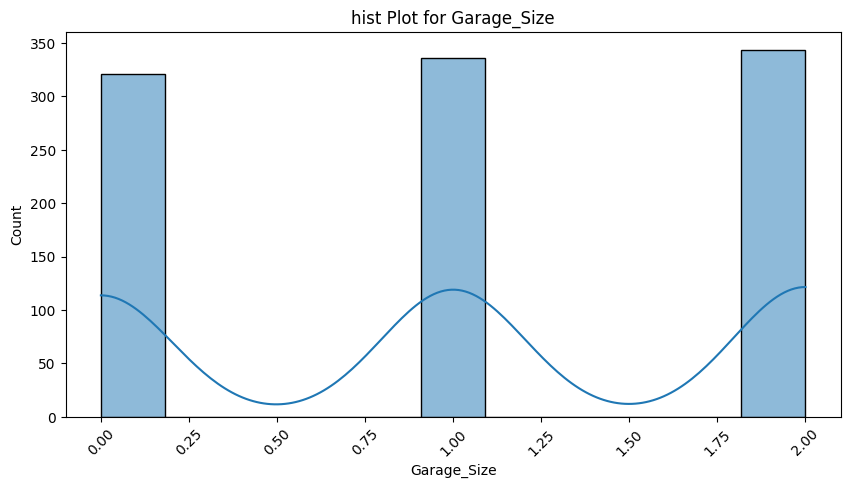

In [65]:
for col in categorical:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=col, kde=True)  # 
    plt.title(f'hist Plot for {col}')
    plt.xticks(rotation=45)
    plt.show()

# sunburst plot for categorical columns


In [66]:
# sunburst plot for categorical columns
import matplotlib.pyplot as plt
import plotly.express as px
# Create a sunburst plot for categorical features]
fig = px.sunburst(data, path=['Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size'], values='House_Price')
fig.show()




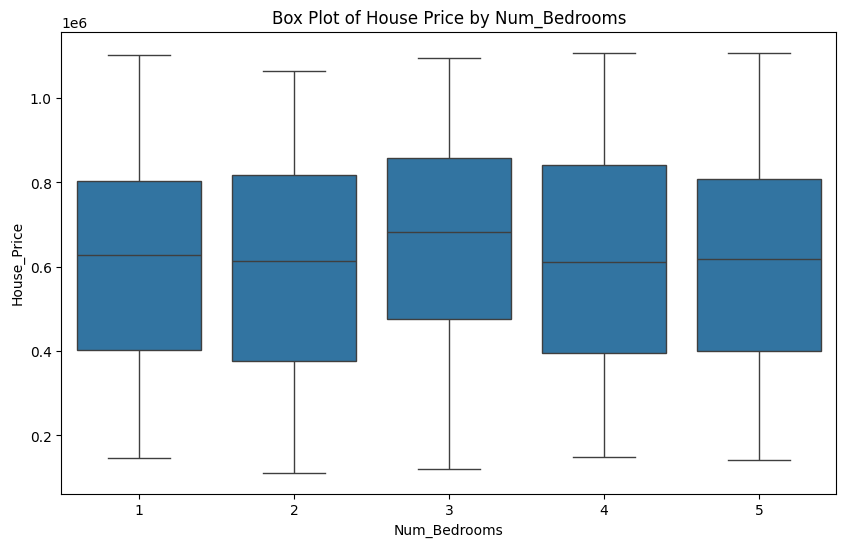

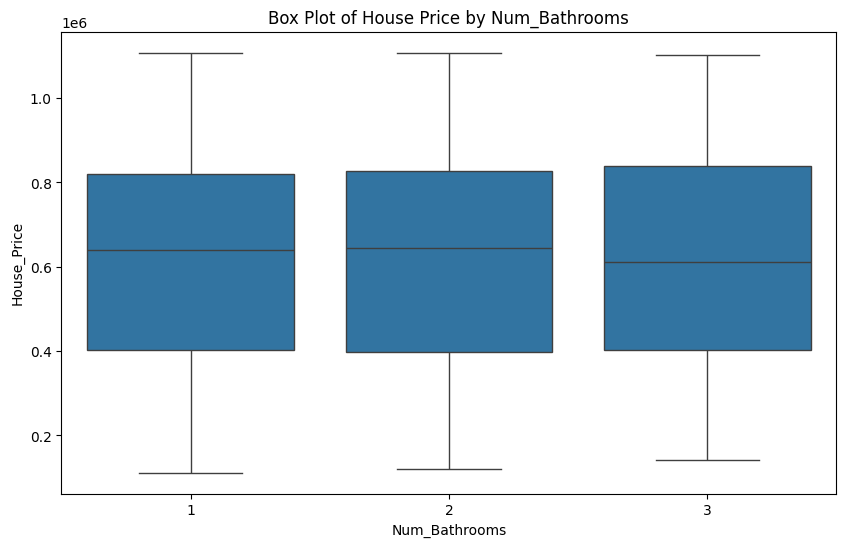

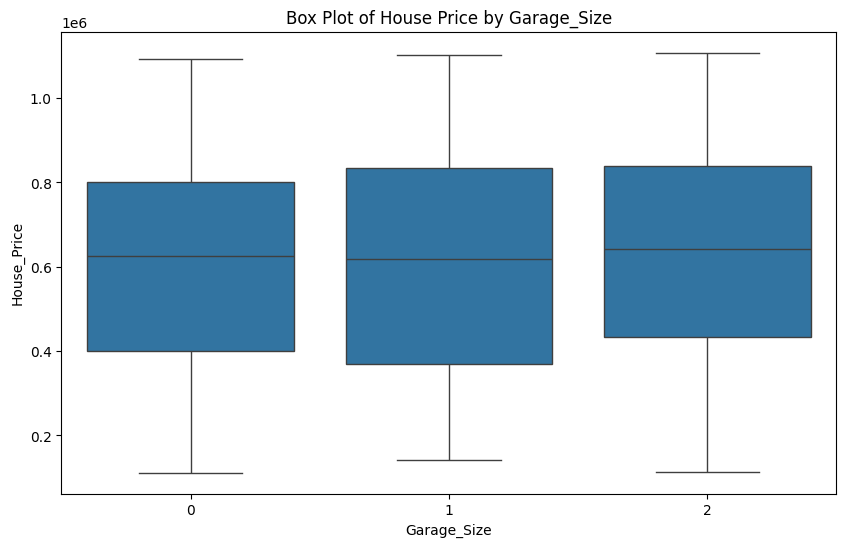

In [67]:
# Boxplot for categorical columns

for col in categorical:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=col, y='House_Price', data=data)
    plt.title(f'Box Plot of House Price by {col}')
    plt.show()

No outliers show in categorical columns, so no need to remove them.

In [68]:
data.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price',
       'Moving_Average_Price'],
      dtype='object')

# Separate the dependent and independent variables

Step1

In [69]:

# Independent variables
x = data[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'Moving_Average_Price']]

# Dependent variable
y = data['House_Price']

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(x)

array([[-1.15980323, -0.69383623, -1.18669921, ..., -1.25465753,
        -0.21312613,         nan],
       [ 1.16072443,  0.00700845,  1.25255918, ..., -0.02700828,
         0.13342042,         nan],
       [ 0.61884297, -1.39468091,  0.03292999, ..., -1.25465753,
         1.17306009,         nan],
       ...,
       [-0.16688515,  0.70785312,  0.03292999, ..., -1.25465753,
        -1.25276579,  0.62235531],
       [ 1.52011933,  1.4086978 ,  0.03292999, ..., -1.25465753,
         0.47996698,  0.65492403],
       [ 0.36065239,  0.70785312,  0.03292999, ...,  1.20064096,
        -1.25276579,  1.0800658 ]], shape=(1000, 8))

# Train test split


step 2

In [71]:
# step 2: Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model import

##  step 3: Model training

In [72]:
# step 3: Model import

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [73]:
# Linear Regression
x_train['Moving_Average_Price'] = x_train['Moving_Average_Price'].fillna(x_train['Moving_Average_Price'].mean())
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [74]:
svm = SVR()
svm.fit(x_train, y_train)

SVR()

In [75]:
RF=RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
Gr=GradientBoostingRegressor()
Gr.fit(x_train, y_train)

GradientBoostingRegressor()

# Step:4  prediction 

In [79]:
x_test['Moving_Average_Price'] = x_test['Moving_Average_Price'].fillna(x_train['Moving_Average_Price'].mean())

y_pred_lr=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=RF.predict(x_test)
y_pred4=Gr.predict(x_test)


In [80]:
df1=pd.DataFrame({'Actual': y_test, 'lr': y_pred_lr, 'svm': y_pred2, 'RF': y_pred3, 'Gr': y_pred4})

In [81]:
df1

Actual            lr            svm            RF            Gr
521  9.010005e+05  8.686889e+05  629452.031107  8.534957e+05  8.643593e+05
737  4.945375e+05  4.903172e+05  629449.277804  5.059275e+05  4.946142e+05
740  9.494042e+05  9.456363e+05  629448.844746  9.528663e+05  9.383716e+05
660  1.040389e+06  1.033422e+06  629453.938525  1.032694e+06  1.035503e+06
411  7.940100e+05  7.767157e+05  629453.371434  7.989840e+05  7.831100e+05
..            ...           ...            ...           ...           ...
408  8.245296e+05  8.183435e+05  629453.154952  8.045616e+05  8.179414e+05
332  1.803936e+05  1.671751e+05  629450.031320  1.715432e+05  1.684648e+05
208  9.658167e+05  9.749380e+05  629452.265364  9.843952e+05  9.828760e+05
613  4.336642e+05  4.405493e+05  629450.799550  4.404220e+05  4.432267e+05
78   6.639050e+05  6.632745e+05  629450.136059  6.625818e+05  6.517099e+05

[200 rows x 5 columns]

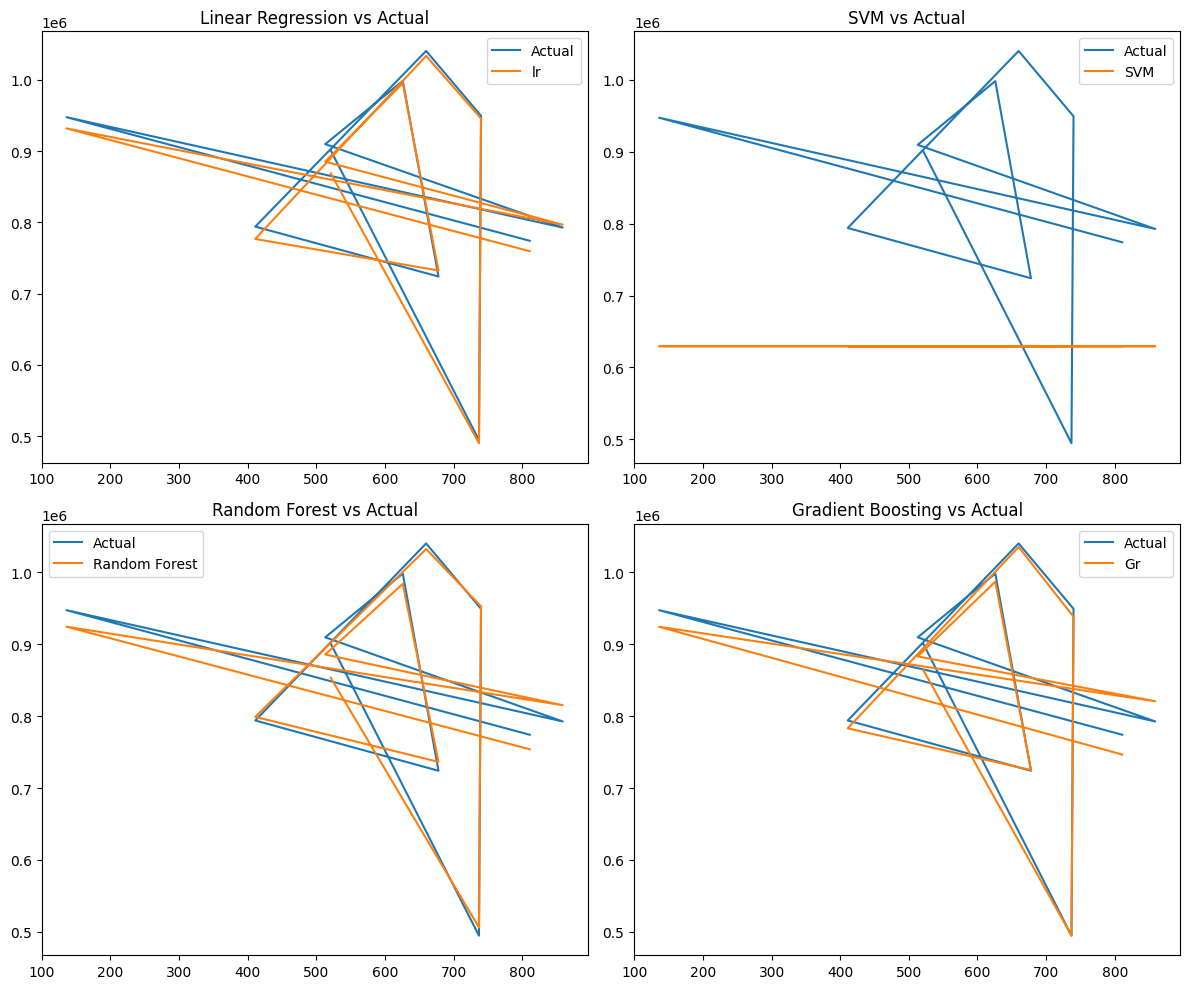

In [82]:
# compare performance visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Linear Regression
axes[0, 0].plot(df1['Actual'].iloc[0:11], label='Actual')
axes[0, 0].plot(df1['lr'].iloc[0:11], label='lr')
axes[0, 0].set_title('Linear Regression vs Actual')
axes[0, 0].legend()

# Subplot 2: SVM
axes[0, 1].plot(df1['Actual'].iloc[0:11], label='Actual')
axes[0, 1].plot(df1['svm'].iloc[0:11], label='SVM')
axes[0, 1].set_title('SVM vs Actual')
axes[0, 1].legend()

# Subplot 3: Random Forest
axes[1, 0].plot(df1['Actual'].iloc[0:11], label='Actual')
axes[1, 0].plot(df1['RF'].iloc[0:11], label='Random Forest')
axes[1, 0].set_title('Random Forest vs Actual')
axes[1, 0].legend()

# Subplot 4: Gradient Boosting (Gr)
axes[1, 1].plot(df1['Actual'].iloc[0:11], label='Actual')
axes[1, 1].plot(df1['Gr'].iloc[0:11], label='Gr')
axes[1, 1].set_title('Gradient Boosting vs Actual')
axes[1, 1].legend()

plt.tight_layout()
plt.show()



In [83]:
# score
from sklearn import metrics

#r2 score: It will compare the predicted value with the actual value  & give us the score as a output

#lr
score1=metrics.r2_score(y_test, y_pred_lr) 

#svm
score2=metrics.r2_score(y_test, y_pred2)
 
#RF
score3=metrics.r2_score(y_test, y_pred3) 
#Gr
score4=metrics.r2_score(y_test, y_pred4)

print(score1, score2, score3, score4)

0.9984262144270124 -0.0013837250470016826 0.9931341490286139 0.996566036263298


# mean squared error


In [84]:
# mean squared error
#lr
mse1=metrics.mean_squared_error(y_test, y_pred_lr)
mse2=metrics.mean_squared_error(y_test, y_pred2)
mse3=metrics.mean_squared_error(y_test, y_pred3)
mse4=metrics.mean_squared_error(y_test, y_pred4)

print(mse1, mse2, mse3, mse4)

101444419.33355343 64548050421.26452 442564906.5398154 221349377.7433117


In [85]:
# save the model
import joblib
joblib.dump(lr, 'house_price_model.pkl')

['house_price_model.pkl']

In [86]:
# Load the model
loaded_model = joblib.load('linear_regression_model.pkl')


In [87]:

# Predict using the loaded model
loaded_model.predict(x_test)


c:\Users\DELL\miniconda3\envs\python_eda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



array([ 868688.86581896,  490317.17743918,  945636.28646509,
       1033421.85219108,  776715.69615114,  732444.03905647,
        995082.30786687,  885165.55520951,  796739.09857591,
        931745.46238881,  759490.27003158,  645396.09204993,
        217740.97014   , 1047445.5002934 ,  536993.04067762,
        187890.01699743,  456802.26336431,  357959.61024294,
        743118.44117698,  362680.76134023,  775116.94282415,
        478197.19275643,  680999.91332429,  889453.79916625,
        447167.21939191,  397025.04002642,  454325.38653156,
        442850.91744657,  187350.15422122,  491669.6219499 ,
        279682.96897859,  895952.97438332,  783589.57904784,
        352209.69169225,  479345.13346414,  766605.68494964,
        474618.58473791,  572435.25408304,  303469.71637063,
        154598.14378474,  304340.27628262,  299657.44091838,
        508592.21259045,  309995.99930432, 1082137.87573072,
       1011307.59966214,  760353.72906479,  807412.51953363,
       1025549.21777534,

In [88]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [89]:
# Load the scaler
loaded_scaler = joblib.load('scaler.pkl')


In [90]:
# Predict using the loaded scaler
loaded_scaler.transform(x_test)


array([[ 0.95353446,  0.00700845, -1.18669921, ..., -0.02700828,
        -0.21312613,  0.26860733],
       [-0.40276296,  0.00700845, -1.18669921, ..., -0.02700828,
        -0.55967269, -1.3314233 ],
       [ 1.50816607, -1.39468091,  1.25255918, ..., -0.02700828,
         0.82651353, -1.59876863],
       ...,
       [ 1.33524213,  0.70785312,  0.03292999, ..., -1.25465753,
        -0.55967269,  0.40284978],
       [-0.76295475, -1.39468091, -1.18669921, ...,  1.20064096,
         0.82651353, -0.43733426],
       [ 0.30247982, -1.39468091, -1.18669921, ...,  1.20064096,
        -1.59931235, -0.82750971]], shape=(200, 8))

In [91]:
# Save the data
data.to_csv('processed_house_price_data.csv', index=False)


In [92]:
# Load the data
loaded_data = pd.read_csv('processed_house_price_data.csv')
loaded_data.head()

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  Moving_Average_Price  
0            0                     5  2.623829e+05                   NaN  
1            1                     6  9.852609e+05                   NaN  
2            0                     9  7.779774e+05                   NaN  
3            1                     8  2.296989e+05                   NaN  
4            0                     8  1.041741e+06                   NaN

In [93]:
# Value enter by user  in rows
Square_Footage = int(input("Enter the square footage of the house: "))
Num_Bedrooms = int(input("Enter the number of bedrooms: "))
Num_Bathrooms = int(input("Enter the number of bathrooms: "))
Year_Built = int(input("Enter the year the house was built: "))
Lot_Size = float(input("Enter the lot size in acres: "))
Garage_Size = int(input("Enter the garage size in square feet: "))
Neighborhood_Quality = input("Enter the neighborhood quality")
House_Price = float(input("Enter the house price: "))
Moving_Average_Price = float(input("Enter the 30-day moving average price: "))
# Create a DataFrame for the input data
df = pd.DataFrame({'Square Footage': [Square_Footage], 'Num_Bedrooms': [Num_Bedrooms],
                     'Num_Bathrooms': [Num_Bathrooms], 'Year_Built': [Year_Built],
                     'Lot_Size': [Lot_Size], 'Garage_Size': [Garage_Size],
                     'Neighborhood_Quality': [Neighborhood_Quality],
                     'Moving_Average_Price': [Moving_Average_Price]})
df


# create a html file to open in chorme
html_file = 'house_price_prediction.html'
# Predict the house price using the loaded model
predicted_price = loaded_model.predict(df)
# Save the prediction to an HTML file
with open(html_file, 'w') as f:
    f.write(f"The predicted house price is: {predicted_price[0]}")
# Open the HTML file in the default web browser
import webbrowser
webbrowser.open(html_file)
# Display the predicted price]
print(f"The predicted house price is: {predicted_price[0]}")
# Save the prediction to a CSV file
predicted_df = pd.DataFrame({'Predicted_House_Price': predicted_price})
predicted_df.to_csv('predicted_house_price.csv', index=False)
# Display the predicted price
print(f"The predicted house price is: {predicted_price[0]}")
# Save the prediction to a CSV file

c:\Users\DELL\miniconda3\envs\python_eda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



The predicted house price is: 16123755.412426611
The predicted house price is: 16123755.412426611


In [ ]:
# Load the model
import joblib
loaded_model = joblib.load('house_price_model.pkl')

# Value enter by user  in rows
Square_Footage = int(input("Enter the square footage of the house: "))
Num_Bedrooms = int(input("Enter the number of bedrooms: "))
Num_Bathrooms = int(input("Enter the number of bathrooms: "))
Year_Built = int(input("Enter the year the house was built: "))
Lot_Size = float(input("Enter the lot size in acres: "))
Garage_Size = int(input("Enter the garage size in square feet: "))
Neighborhood_Quality = int(input("Enter the neighborhood quality: "))
House_Price = float(input("Enter the house price: "))
Moving_Average_Price = float(input("Enter the 30-day moving average price: "))
# Create a DataFrame for the input data
df = pd.DataFrame({'Square_Footage': [Square_Footage], 'Num_Bedrooms': [Num_Bedrooms],
                     'Num_Bathrooms': [Num_Bathrooms], 'Year_Built': [Year_Built],
                     'Lot_Size': [Lot_Size], 'Garage_Size': [Garage_Size],
                     'Neighborhood_Quality': [Neighborhood_Quality],
                     'Moving_Average_Price': [Moving_Average_Price]})

# create a html file to open in chorme
html_file = 'house_price_prediction.html'
# Predict the house price using the loaded model
predicted_price = loaded_model.predict(df)
# Save the prediction to an HTML file
with open(html_file, 'w') as f:
    f.write(f"The predicted house price is: {predicted_price[0]}")
# Open the HTML file in the default web browser
import webbrowser
webbrowser.open(html_file)
# Display the predicted price]
print(f"The predicted house price is: {predicted_price[0]}")
# Save the prediction to a CSV file
predicted_df = pd.DataFrame({'Predicted_House_Price': predicted_price})
predicted_df.to_csv('predicted_house_price.csv', index=False)
# Display the predicted price
print(f"The predicted house price is: {predicted_price[0]}")
# Save the prediction to a CSV file

#Add a html page to display the predicted price with a button to download the CSV file and a button to download the model and also add a background image to the html page
html_content = f"""


The predicted house price is: 16600588.200827027
The predicted house price is: 16600588.200827027
